## A short guide and example to run fingerprinting: Contributions

This notebook show how to use our implementation of the “fingerprinting approach” based on the Clarke and Minella (2016) method. The proposed alternative approach allows calculating the proportions of each source in the composition of suspended sediment present in rivers and measuring the increase in uncertainty when reducing the number of samples.
To do this, use the following:

Data: 15/11/23 run each target and Boxplot with reductions and CV plot
                                    

The first step is to import the fingerprinting python module:

In [1]:
from PropSource_Target_GP import PropSource_Target_GP

We need to create a fingerprinting object instance and to import the data file:

In [2]:
fp = PropSource_Target_GP("Data_Guapore_FGP_Py.xlsx")
#fp = PropSource_Target_GP("sampledata.xlsx")


In the next cell we can print some information about the dataset for:

CB = Channel Banks

UR = Unpaved Roads 

CF = Crop Fields

Y = Suspended Sediment 


In [3]:
fp.infos()

Sheet name: g_Source(CB)
Columns: ['Co', 'Cr', 'La', 'Li', 'Ni', 'Al', 'Mn', 'P']
Number of samples: 46
--
Sheet name: g_Source(UR)
Columns: ['Co', 'Cr', 'La', 'Li', 'Ni', 'Al', 'Mn', 'P']
Number of samples: 58
--
Sheet name: g_Source(CF)
Columns: ['Co', 'Cr', 'La', 'Li', 'Ni', 'Al', 'Mn', 'P']
Number of samples: 159
--
Sheet name: Sediment(Y)
Columns: ['Co', 'Cr', 'La', 'Li', 'Ni', 'Al', 'Mn', 'P']
Number of samples: 26
--


In this cell below it is defined as:

nCB = number of samples collected in the CB (Channel Banks)

nUR = number of samples collected in the UR (Unpaved Roads) 

nCF = number of samples collected in the CF (Crop Fields)

nY = number of samples collected in the Y (Suspended Sediment)

In [4]:
nsample=[]
nsample = fp.nsample(nsample)
print('nsample', nsample)

nCB = nsample[0]  # max 
nUR = nsample[1]  # max 
nCF = nsample[2] # max 
nY = nsample[3] # max 


nsample [ 46  58 159  26]


 Cloud Proportions: Scatter plot of the set of feasible solutions of the overdetermined linear system
 
                    P1 = CB proportion
                    
                    P2 = UR proportion

Cloud Proportions: The confidence region ($95\%$) calculated from the set of feasible solutions using Solve=2 for all samples

Next cells: Suspended sediment reduction

Run multiples times and store for each number of resample in nCBs list (Subset=1)

Calcules the coefficient of variation CBcv (Solve = 2)

Cloud Proportions: The confidence region (95%) calculated from the set of feasible solutions each reduction of nCB samples


In [5]:
#Choose the sample subset for reduction
n=50 #times
ps=0.1
m=nCB*ps
nCBs=[int(m),int(2*m),int(3*m),int(4*m),int(5*m),int(6*m),int(7*m),int(8*m),int(9*m),nCB]
#nCBs=[int(m),int(2*m)]
print(nCBs)
plots2D=nCBs

CBcv2 = fp.multi_runs(n,nY, nCBs, nUR, nCF,plots2D)

[4, 9, 13, 18, 23, 27, 32, 36, 41, 46]
____
Set Samples sizes: [4, 9, 13, 18, 23, 27, 32, 36, 41, 46]
Target= 1 Sample size= 4
Target= 1 Sample size= 9
Target= 1 Sample size= 13
Target= 1 Sample size= 18
Target= 1 Sample size= 23
Target= 1 Sample size= 27
Target= 1 Sample size= 32
Target= 1 Sample size= 36
Target= 1 Sample size= 41
Target= 1 Sample size= 46
____
Set Samples sizes: [4, 9, 13, 18, 23, 27, 32, 36, 41, 46]
Target= 2 Sample size= 4
Target= 2 Sample size= 9
Target= 2 Sample size= 13
Target= 2 Sample size= 18
Target= 2 Sample size= 23
Target= 2 Sample size= 27
Target= 2 Sample size= 32
Target= 2 Sample size= 36
Target= 2 Sample size= 41
Target= 2 Sample size= 46
____
Set Samples sizes: [4, 9, 13, 18, 23, 27, 32, 36, 41, 46]
Target= 3 Sample size= 4
Target= 3 Sample size= 9
Target= 3 Sample size= 13
Target= 3 Sample size= 18
Target= 3 Sample size= 23
Target= 3 Sample size= 27
Target= 3 Sample size= 32
Target= 3 Sample size= 36
Target= 3 Sample size= 41
Target= 3 Sample size= 4

Target= 25 Sample size= 46
____
Set Samples sizes: [4, 9, 13, 18, 23, 27, 32, 36, 41, 46]
Target= 26 Sample size= 4
Target= 26 Sample size= 9
Target= 26 Sample size= 13
Target= 26 Sample size= 18
Target= 26 Sample size= 23
Target= 26 Sample size= 27
Target= 26 Sample size= 32
Target= 26 Sample size= 36
Target= 26 Sample size= 41
Target= 26 Sample size= 46
------------------------------------------------------------------------------------------------------------------------
Solve_2
Target 	nSamp 	MeanA 	Std 	CV_A 	NComb 	CR_Mean	Std_CR	MeanP1 	StdP1 	MeanP2 	StdP2 	MeanP3 	StdP3
_________________________________________________________________________________________________________________________
1 	4 	0.413 	0.015 	3.681 	36888 	 5173 	 1240 	0.265 	0.201 	0.198 	0.181 	0.537 	0.252
1 	9 	0.418 	0.014 	3.343 	82998 	11964 	 1566 	0.262 	0.194 	0.199 	0.178 	0.538 	0.249
1 	13 	0.422 	0.010 	2.461 	119886 	17255 	 1731 	0.263 	0.196 	0.199 	0.178 	0.538 	0.250
1 	18 	0.423 	0.009 	2.

Next cells: Cropped field reduction

Run multiples times and store for each number of resample in nURs list (Subset=2)

Calcules the coefficient of variation URcv (Solve = 2)

Cloud Proportions: The confidence region (95%) calculated from the set of feasible solutions each reduction of nUR samples


In [6]:
#Choose the sample subset for reduction
n=50 #times
ps=0.1
m=nUR*ps
nURs=[int(m),int(2*m),int(3*m),int(4*m),int(5*m),int(6*m),int(7*m),int(8*m),int(9*m),nUR]
#nURs=[int(m),int(2*m)]#test
print(nURs)
plots2D=nURs

URcv2 = fp.multi_runs(n, nY,nCB,nURs,nCF, plots2D)


[5, 11, 17, 23, 29, 34, 40, 46, 52, 58]
____
Set Samples sizes: [5, 11, 17, 23, 29, 34, 40, 46, 52, 58]
Target= 1 Sample size= 5
Target= 1 Sample size= 11
Target= 1 Sample size= 17
Target= 1 Sample size= 23
Target= 1 Sample size= 29
Target= 1 Sample size= 34
Target= 1 Sample size= 40
Target= 1 Sample size= 46
Target= 1 Sample size= 52
Target= 1 Sample size= 58
____
Set Samples sizes: [5, 11, 17, 23, 29, 34, 40, 46, 52, 58]
Target= 2 Sample size= 5
Target= 2 Sample size= 11
Target= 2 Sample size= 17
Target= 2 Sample size= 23
Target= 2 Sample size= 29
Target= 2 Sample size= 34
Target= 2 Sample size= 40
Target= 2 Sample size= 46
Target= 2 Sample size= 52
Target= 2 Sample size= 58
____
Set Samples sizes: [5, 11, 17, 23, 29, 34, 40, 46, 52, 58]
Target= 3 Sample size= 5
Target= 3 Sample size= 11
Target= 3 Sample size= 17
Target= 3 Sample size= 23
Target= 3 Sample size= 29
Target= 3 Sample size= 34
Target= 3 Sample size= 40
Target= 3 Sample size= 46
Target= 3 Sample size= 52
Target= 3 Sample 

Target= 25 Sample size= 46
Target= 25 Sample size= 52
Target= 25 Sample size= 58
____
Set Samples sizes: [5, 11, 17, 23, 29, 34, 40, 46, 52, 58]
Target= 26 Sample size= 5
Target= 26 Sample size= 11
Target= 26 Sample size= 17
Target= 26 Sample size= 23
Target= 26 Sample size= 29
Target= 26 Sample size= 34
Target= 26 Sample size= 40
Target= 26 Sample size= 46
Target= 26 Sample size= 52
Target= 26 Sample size= 58
------------------------------------------------------------------------------------------------------------------------
Solve_2
Target 	nSamp 	MeanA 	Std 	CV_A 	NComb 	CR_Mean	Std_CR	MeanP1 	StdP1 	MeanP2 	StdP2 	MeanP3 	StdP3
_________________________________________________________________________________________________________________________
1 	5 	0.394 	0.044 	11.058 	36570 	 5080 	  990 	0.273 	0.201 	0.184 	0.168 	0.542 	0.250
1 	11 	0.413 	0.028 	6.709 	80454 	11924 	 1634 	0.264 	0.193 	0.204 	0.181 	0.532 	0.250
1 	17 	0.415 	0.017 	4.209 	124338 	17517 	 1954 	0.268 

Next cells: Unpaved Roads reduction

Run multiples times and store for each number of resample in nCFs list (Subset=3)

Calcules the coefficient of variation CFcv (Solve = 2)

Cloud Proportions: The confidence region (95%) calculated from the set of feasible solutions each reduction of nCF samples


In [7]:
#Choose the sample subset for reduction
n=50 #times
ps=0.1
m=nCF*ps
nCFs=[int(m),int(2*m),int(3*m),int(4*m),int(5*m),int(6*m),int(7*m),int(8*m),int(9*m),nCF]
#nCFs=[5,m,2*m,3*m,4*m,5*m,6*m,7*m,8*m,9*m,10*m,nCF]
#nCFs=[int(m),int(2*m)]#test
print(nCFs)
plots2D=nCFs
CFcv2 = fp.multi_runs(n, nY,nCB,nUR,nCFs, plots2D)

[15, 31, 47, 63, 79, 95, 111, 127, 143, 159]
____
Set Samples sizes: [15, 31, 47, 63, 79, 95, 111, 127, 143, 159]
Target= 1 Sample size= 15
Target= 1 Sample size= 31
Target= 1 Sample size= 47
Target= 1 Sample size= 63
Target= 1 Sample size= 79
Target= 1 Sample size= 95
Target= 1 Sample size= 111
Target= 1 Sample size= 127
Target= 1 Sample size= 143
Target= 1 Sample size= 159
____
Set Samples sizes: [15, 31, 47, 63, 79, 95, 111, 127, 143, 159]
Target= 2 Sample size= 15
Target= 2 Sample size= 31
Target= 2 Sample size= 47
Target= 2 Sample size= 63
Target= 2 Sample size= 79
Target= 2 Sample size= 95
Target= 2 Sample size= 111
Target= 2 Sample size= 127
Target= 2 Sample size= 143
Target= 2 Sample size= 159
____
Set Samples sizes: [15, 31, 47, 63, 79, 95, 111, 127, 143, 159]
Target= 3 Sample size= 15
Target= 3 Sample size= 31
Target= 3 Sample size= 47
Target= 3 Sample size= 63
Target= 3 Sample size= 79
Target= 3 Sample size= 95
Target= 3 Sample size= 111
Target= 3 Sample size= 127
Target= 3 

Target= 25 Sample size= 31
Target= 25 Sample size= 47
Target= 25 Sample size= 63
Target= 25 Sample size= 79
Target= 25 Sample size= 95
Target= 25 Sample size= 111
Target= 25 Sample size= 127
Target= 25 Sample size= 143
Target= 25 Sample size= 159
____
Set Samples sizes: [15, 31, 47, 63, 79, 95, 111, 127, 143, 159]
Target= 26 Sample size= 15
Target= 26 Sample size= 31
Target= 26 Sample size= 47
Target= 26 Sample size= 63
Target= 26 Sample size= 79
Target= 26 Sample size= 95
Target= 26 Sample size= 111
Target= 26 Sample size= 127
Target= 26 Sample size= 143
Target= 26 Sample size= 159
------------------------------------------------------------------------------------------------------------------------
Solve_2
Target 	nSamp 	MeanA 	Std 	CV_A 	NComb 	CR_Mean	Std_CR	MeanP1 	StdP1 	MeanP2 	StdP2 	MeanP3 	StdP3
_________________________________________________________________________________________________________________________
1 	15 	0.409 	0.038 	9.288 	40020 	 5816 	 1191 	0.262 	0.19

PLOTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend import Legend

In [ ]:
# boxplot choice a specific run
n=50
runn=5
sns.set_style("whitegrid")

for nun in range(1, 2):
    #read files
    dados_CB = pd.read_csv(f"Simulation_Ps_Run{n}_CB_Target{nun}.csv")
    dados_UR = pd.read_csv(f"Simulation_Ps_Run{n}_UR_Target{nun}.csv")
    dados_CF = pd.read_csv(f"Simulation_Ps_Run{n}_CF_Target{nun}.csv")
    if runn==1:
        dados_CBr = dados_CB[dados_CB["times"]==runn]
        dados_URr = dados_UR[dados_UR["times"]==runn]
        dados_CFr = dados_CF[dados_CF["times"]==runn]
    else:
         #dados_CBr =dados_CB[["source","value","times","redu"]].groupby(["source",["times"]==runn,["redu"]=="100%"]).reset_index()
         #dados_URr =dados_UR[["source","value","times","redu"]].groupby(["source",["times"]==runn,["redu"]=="100%"]).reset_index()
         #dados_CFr =dados_CF[["source","value","times","redu"]].groupby(["source",["times"]==runn,["redu"]=="100%"]).reset_index()    
        dados_CBr = dados_CB[(dados_CB["times"]==runn),(dados_CB["redu"]=="100%")]
        dados_URr = dados_UR[(dados_UR["times"]==runn),(dados_UR["redu"]=="100%")]
        dados_CFr = dados_CF[(dados_CF["times"]==runn),(dados_CF["redu"]=="100%")]
    
    # create figure
    fig, axs = plt.subplots(1, 3, figsize=(10, 3),sharey=True, sharex=True)  # 4 rows of 3 plots each to make 12 plots
    axs = axs.ravel()  # Flatten the array of axes
    fig.suptitle("Target"+ ' '+str(nun)+' ') 
    
    
    for i in range(1, 4):  # Loop over target values from 1 to 12 
    #dadosCB = dados_brutos_CB[dados_brutos_CB["Target"]==i]

    #sns.violinplot(y=dados["value"], x=dados["source"], hue=dados["Samples"], ax=axs[i-1], palette='Paired', notch=True)
        if i==1:
            j="CB"
            sns.boxplot(y=dados_CBr["value"],x=dados_CBr["source"],hue=dados_CBr["redu"],ax=axs[i-1],palette='Paired',notch=True)
            axs[i-1].set_title("Reductions at"+ ' '+str(j)+' ')
            axs[i-1].get_legend().remove()
            axs[i-1].set_xlabel('')
        if i==2:
            j="UR"
            sns.boxplot(y=dados_URr["value"],x=dados_URr["source"],hue=dados_URr["redu"],ax=axs[i-1],palette='Paired',notch=True)
            axs[i-1].set_title("Reductions at"+ ' '+str(j)+' ')
            axs[i-1].get_legend().remove()
            axs[i-1].set_xlabel('')
        if i==3:
            j="CF"
            sns.boxplot(y=dados_CFr["value"],x=dados_CFr["source"],hue=dados_CFr["redu"],ax=axs[i-1],palette='Paired',notch=True)
            axs[i-1].get_legend().remove()
            axs[i-1].set_title("Reductions at"+ ' '+str(j)+' ')
            axs[i-1].set_xlabel('')
        
        if i==3:
            axs[i-1].legend(bbox_to_anchor =[1.0, 1.1], prop = {"size": 9},loc='best', title = "% samples")
       
    
# add legend
#plt.legend(bbox_to_anchor =(1.0, 1.0),prop = {"size": 9},loc="best",borderaxespad = 0.0, title = "CB Samples", frameon=False)

#
    for ax in axs.flat:
        ax.set(ylabel='Relative source contribution')

    #ax.set(xlabel='')
# Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        
    plt.tight_layout()
    plt.savefig('Boxplot_GP_runn='+str(runn)+'_Target='+str(nun)+'.png', dpi = 300,bbox_inches='tight')
#plt.savefig('Boxplot_runs='+str(n)+'_Target='+str(nun)+'.eps', bbox_inches='tight')
    plt.savefig('Boxplot_GP_runn='+str(runn)+'_Target='+str(nun)+'.pdf',bbox_inches='tight')

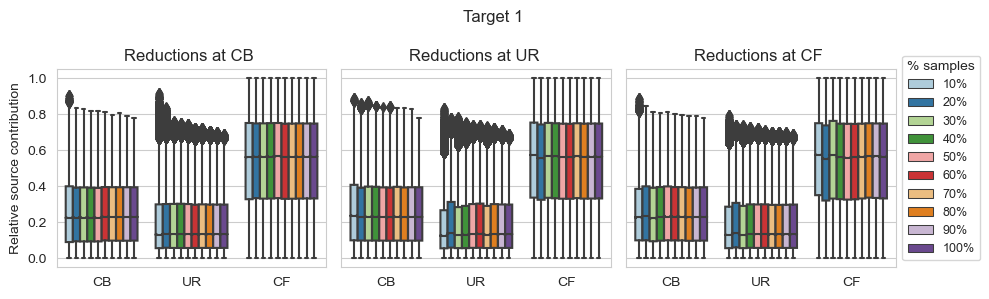

In [2]:
n=50
sns.set_style("whitegrid")
for nun in range(1, 2):
    #read files
    dados_CB = pd.read_csv(f"Simulation_Ps_Run{n}_CB_Target{nun}.csv")
    dados_UR = pd.read_csv(f"Simulation_Ps_Run{n}_UR_Target{nun}.csv")
    dados_CF = pd.read_csv(f"Simulation_Ps_Run{n}_CF_Target{nun}.csv")
    
    # create figure
    fig, axs = plt.subplots(1, 3, figsize=(10,3),sharey=True, sharex=True)  # 4 rows of 3 plots each to make 12 plots
    axs = axs.ravel()  # Flatten the array of axes
    fig.suptitle("Target"+ ' '+str(nun)+' ') 
    
    
    for i in range(1, 4):  # Loop over target values from 1 to 12 
    #dadosCB = dados_brutos_CB[dados_brutos_CB["Target"]==i]

    #sns.violinplot(y=dados["value"], x=dados["source"], hue=dados["Samples"], ax=axs[i-1], palette='Paired', notch=True)
        if i==1:
            j="CB"
            sns.boxplot(y=dados_CB["value"],x=dados_CB["source"],hue=dados_CB["redu"],ax=axs[i-1], palette='Paired', notch=True)
            axs[i-1].set_title("Reductions at"+ ' '+str(j)+' ')
            axs[i-1].get_legend().remove()
            axs[i-1].set_xlabel('')
        if i==2:
            j="UR"
            sns.boxplot(y=dados_UR["value"],x=dados_UR["source"],hue=dados_UR["redu"],ax=axs[i-1], palette='Paired', notch=True)
            axs[i-1].set_title("Reductions at"+ ' '+str(j)+' ')
            axs[i-1].get_legend().remove()
            axs[i-1].set_xlabel('')
        if i==3:
            j="CF"
            sns.boxplot(y=dados_CF["value"],x=dados_CF["source"],hue=dados_CF["redu"],ax=axs[i-1], palette='Paired', notch=True)
            axs[i-1].get_legend().remove()
            axs[i-1].set_title("Reductions at"+ ' '+str(j)+' ')
            axs[i-1].set_xlabel('')
        
        if i==3:
            axs[i-1].legend(bbox_to_anchor =[1.0, 1.1], prop = {"size": 9},loc='best', title = "% samples")
       
    
# add legend
#plt.legend(bbox_to_anchor =(1.0, 1.0),prop = {"size": 9},loc="best",borderaxespad = 0.0, title = "CB Samples", frameon=False)

#
    for ax in axs.flat:
        ax.set(ylabel='Relative source contribution')

    #ax.set(xlabel='')
# Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        
    plt.tight_layout()
    plt.savefig('Boxplot_runs='+str(n)+'_Target='+str(nun)+'.png', dpi = 300,bbox_inches='tight')
#plt.savefig('Boxplot_runs='+str(n)+'_Target='+str(nun)+'.eps', bbox_inches='tight')
    plt.savefig('Boxplot_runs='+str(n)+'_Target='+str(nun)+'.pdf',bbox_inches='tight')
   
            

C:\Users\lbuligon\AppData\Local\Temp\ipykernel_13328\961810963.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8, 5))


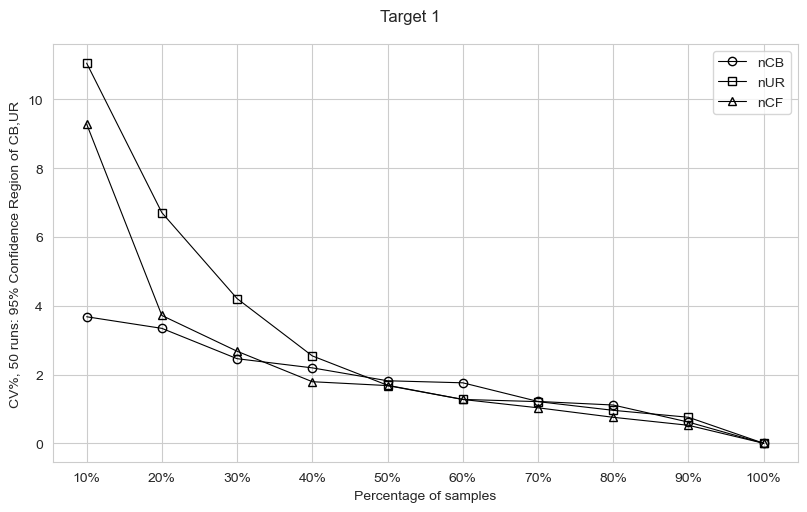

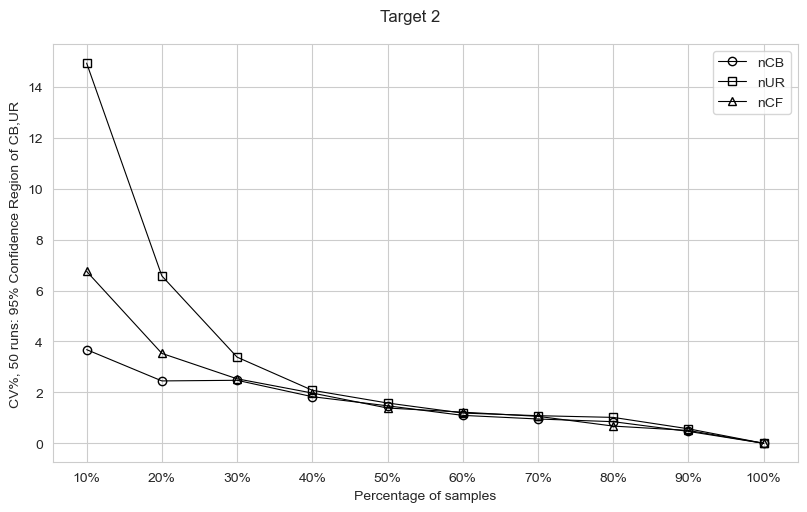

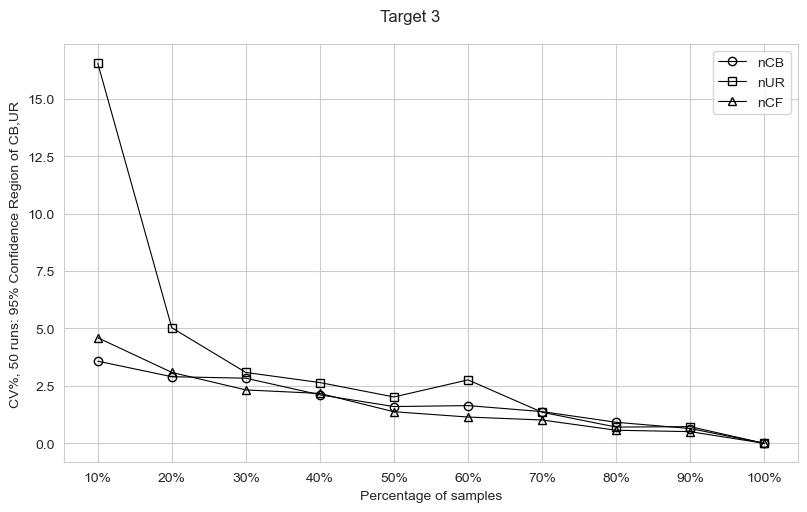

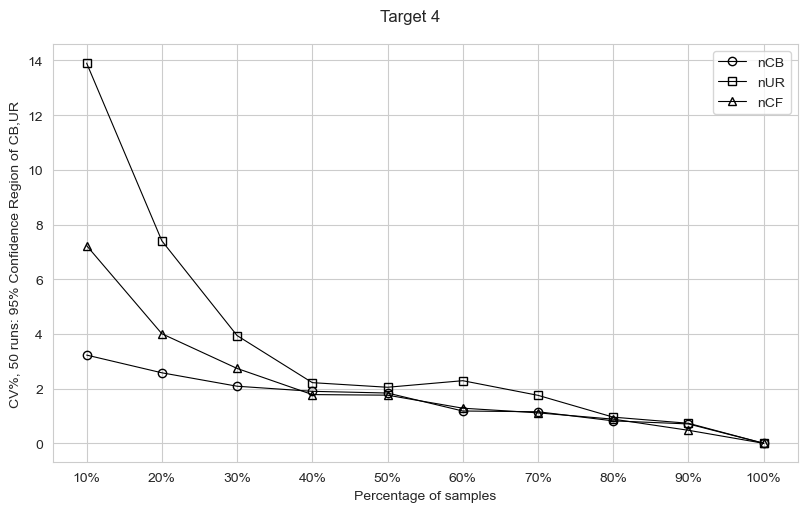

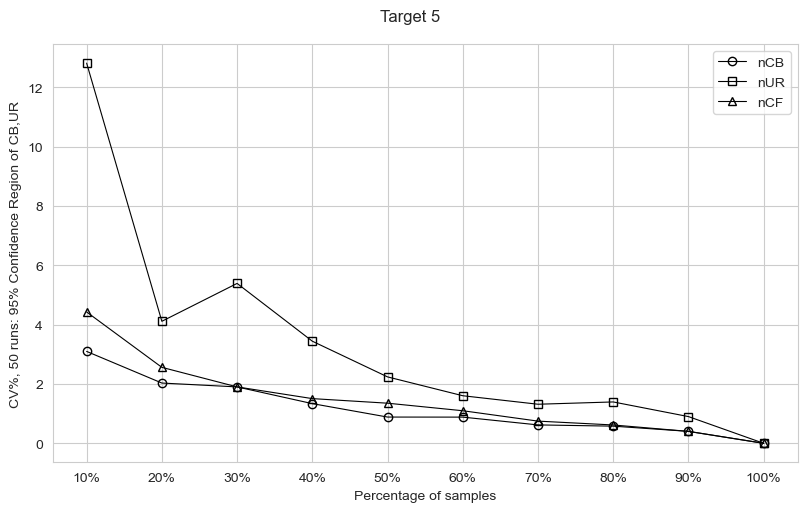

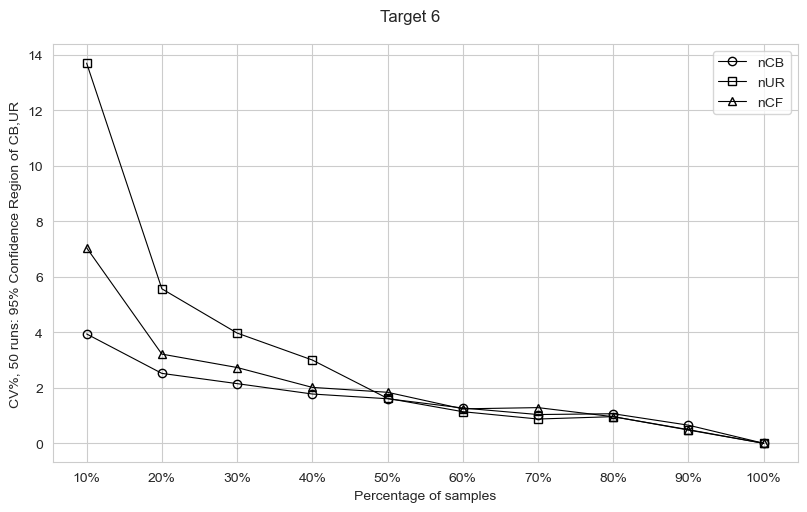

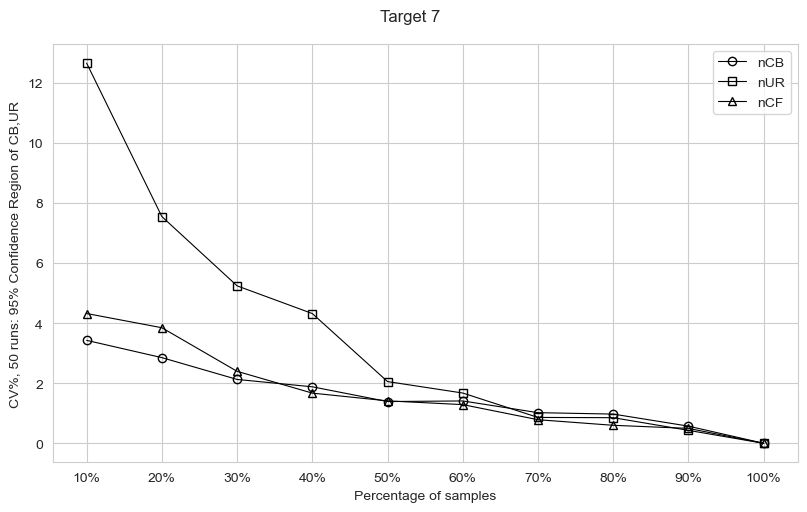

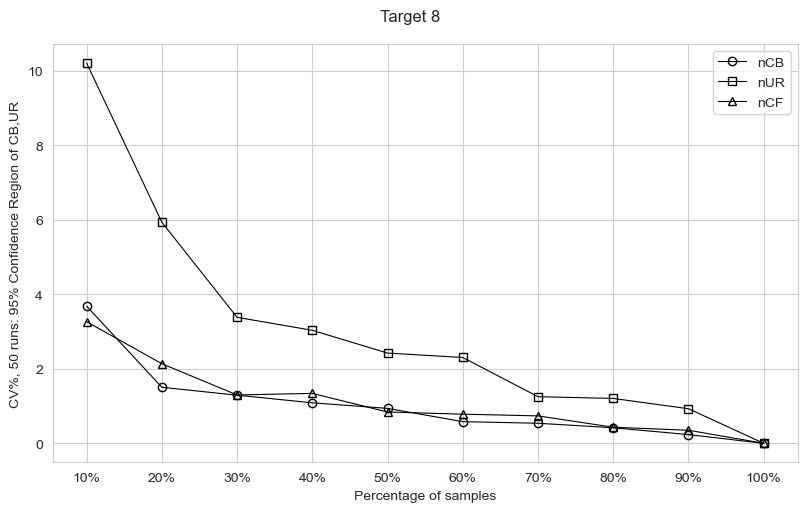

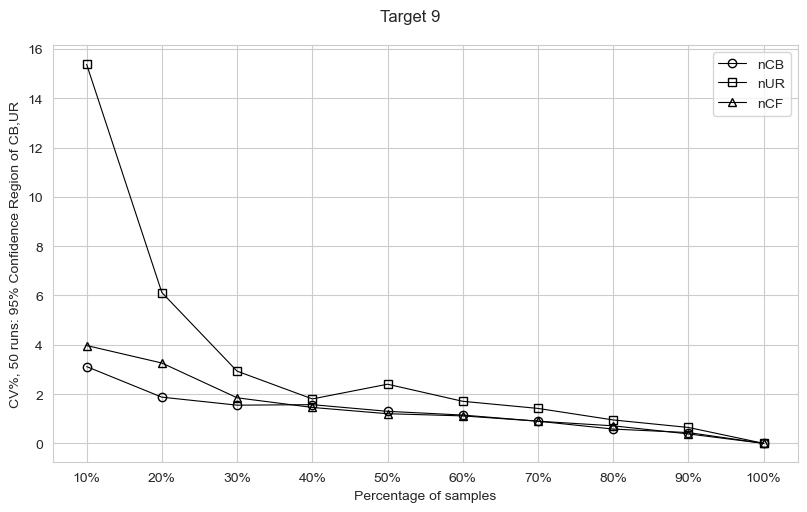

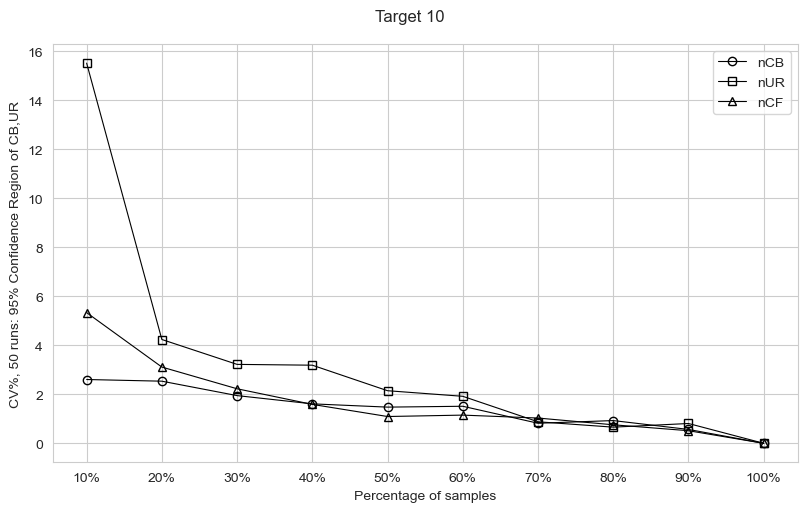

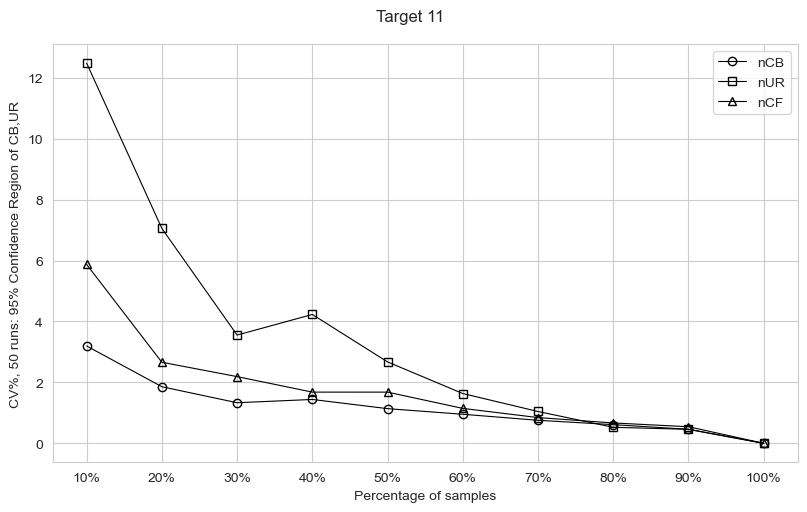

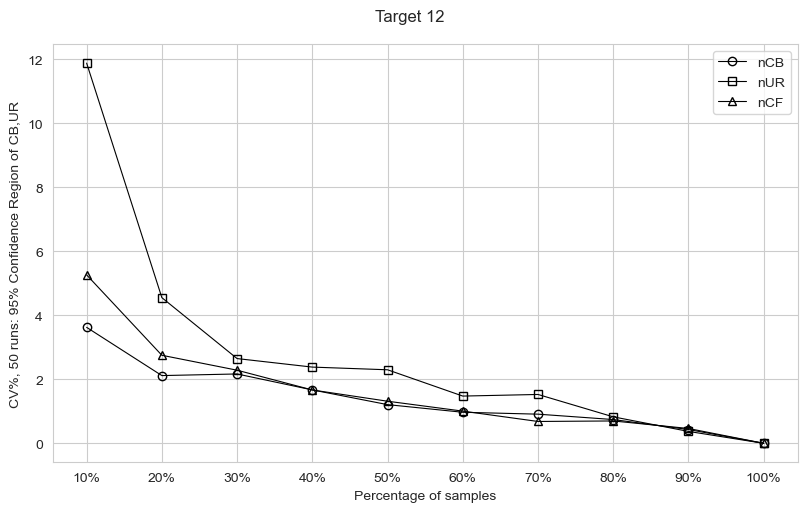

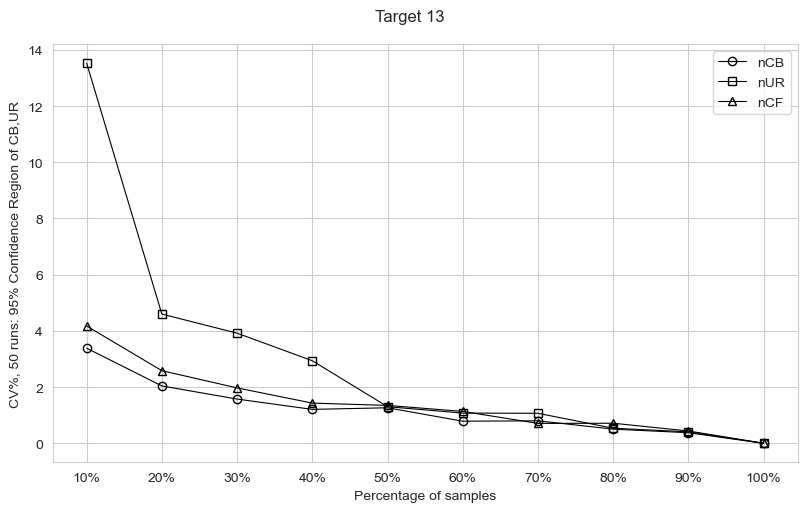

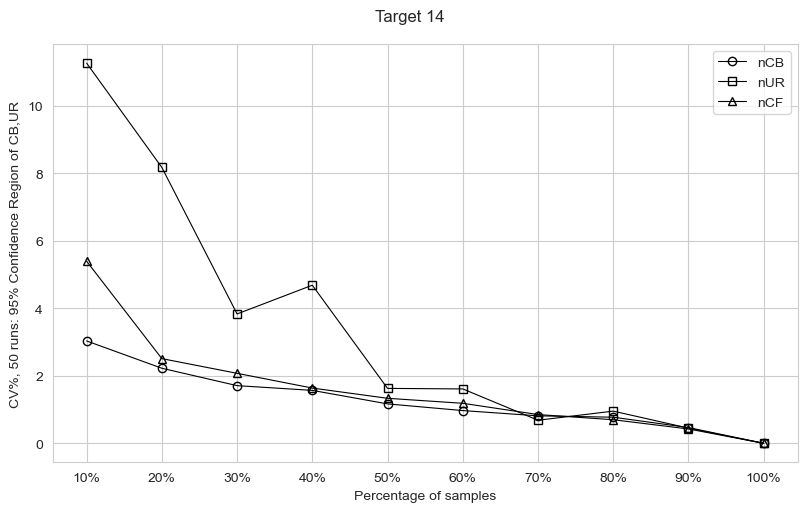

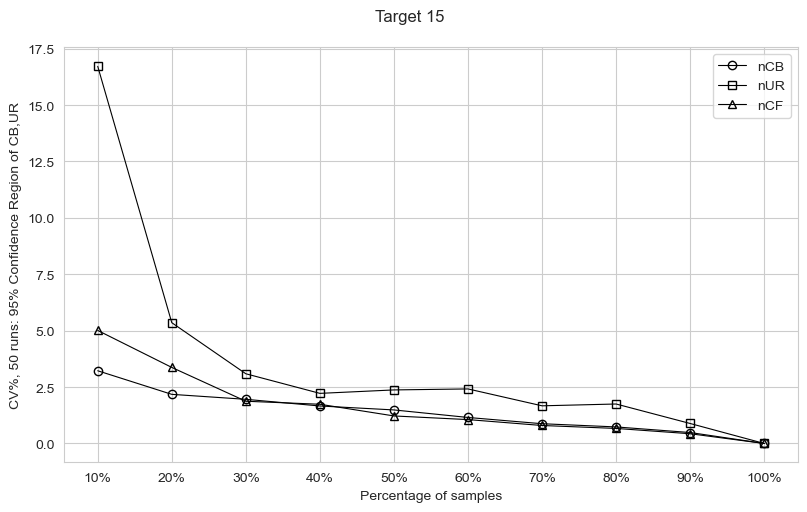

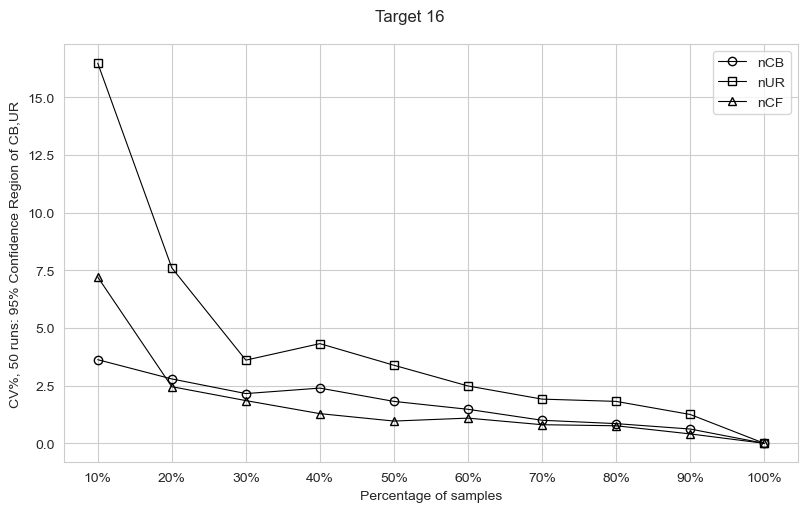

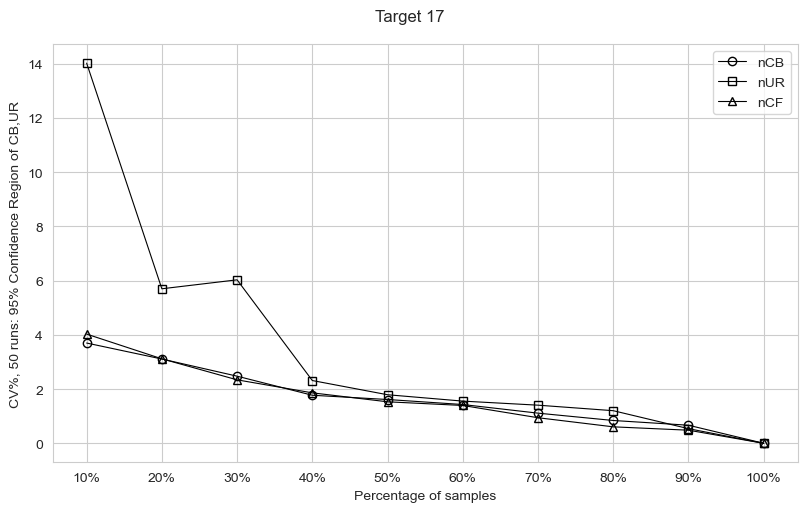

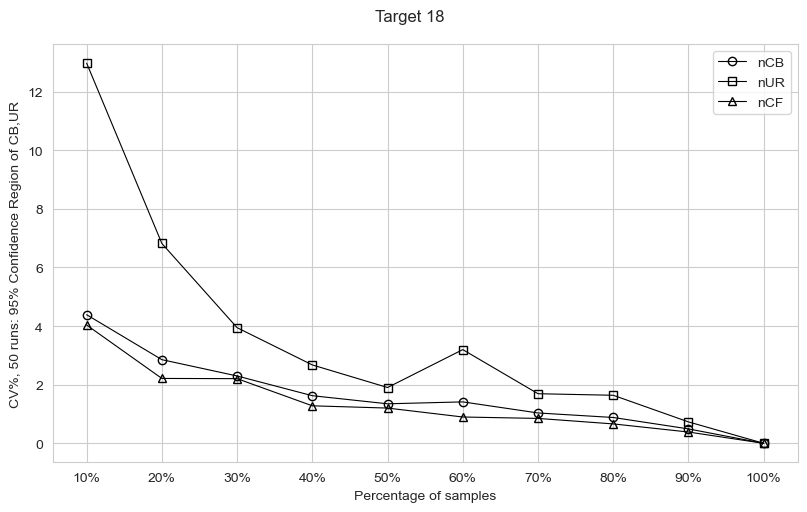

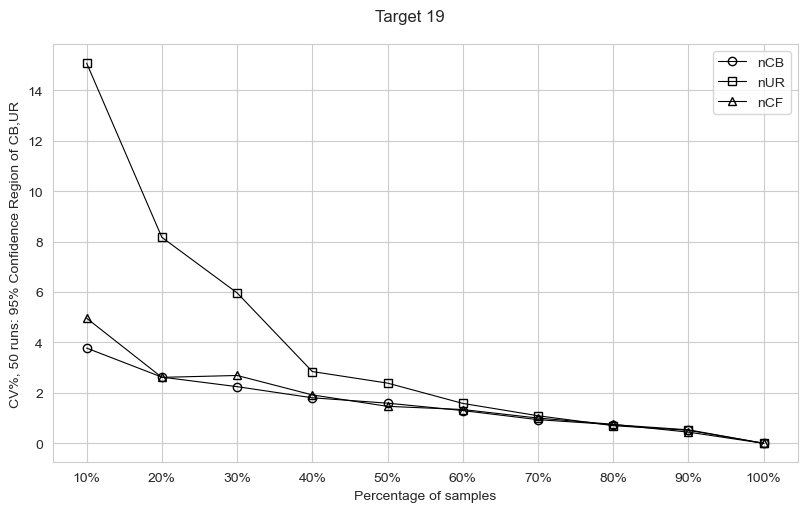

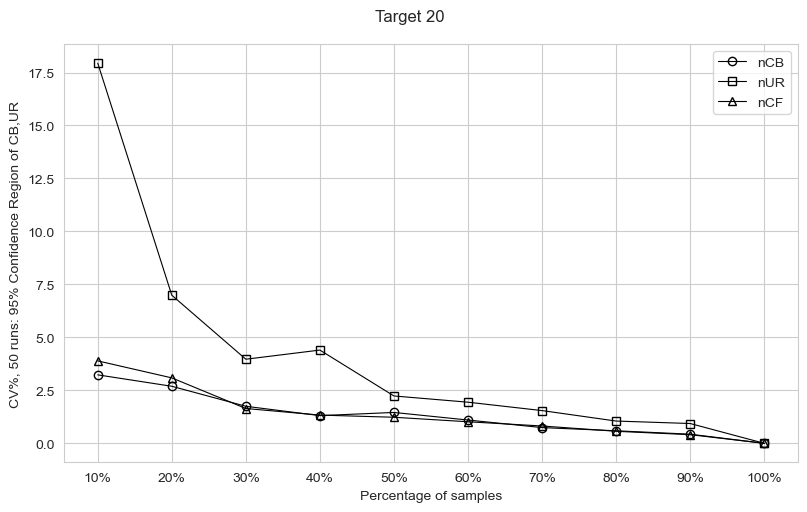

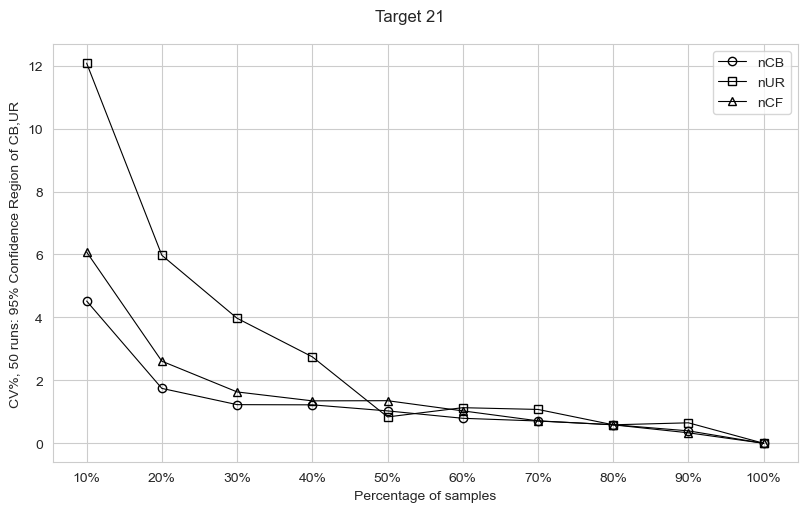

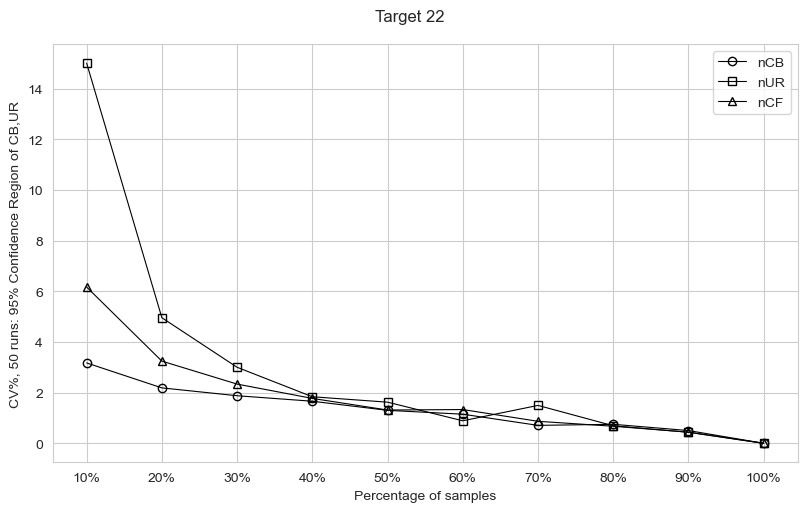

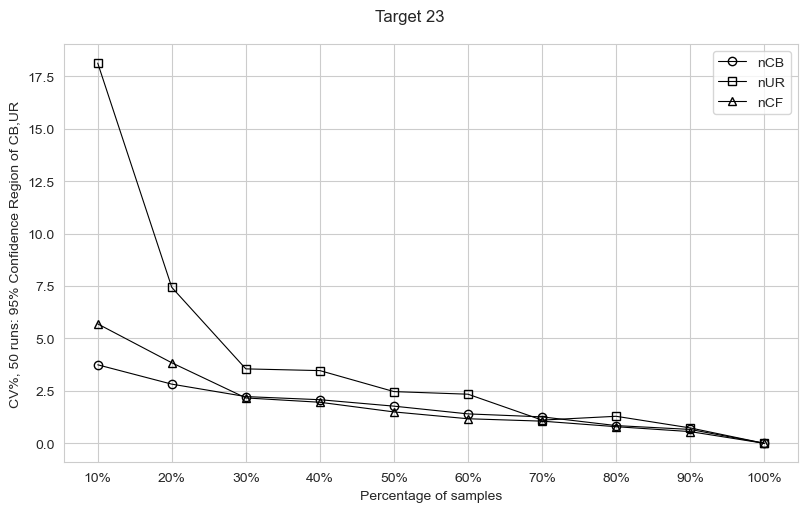

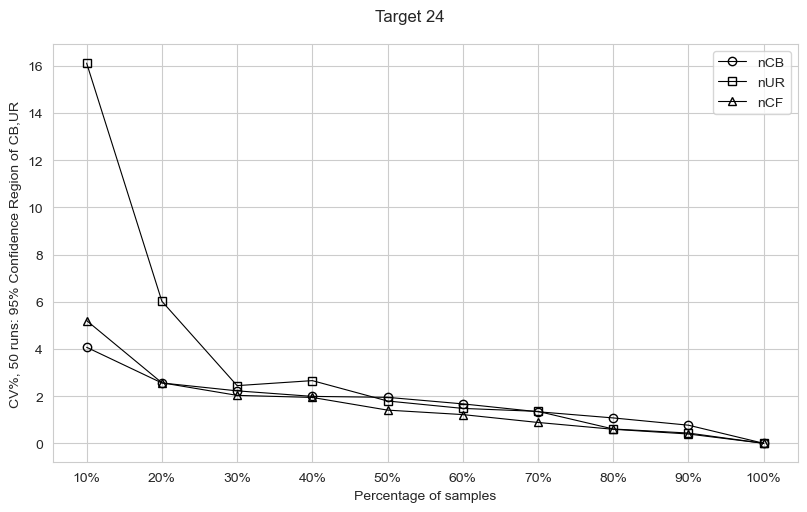

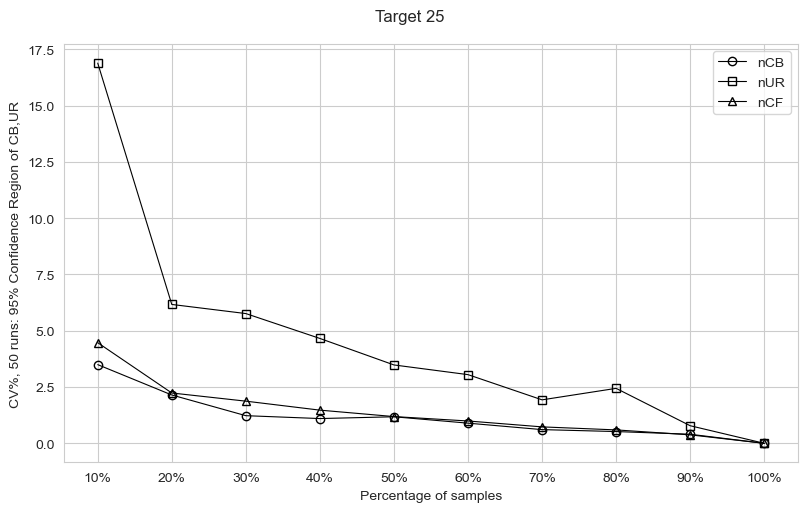

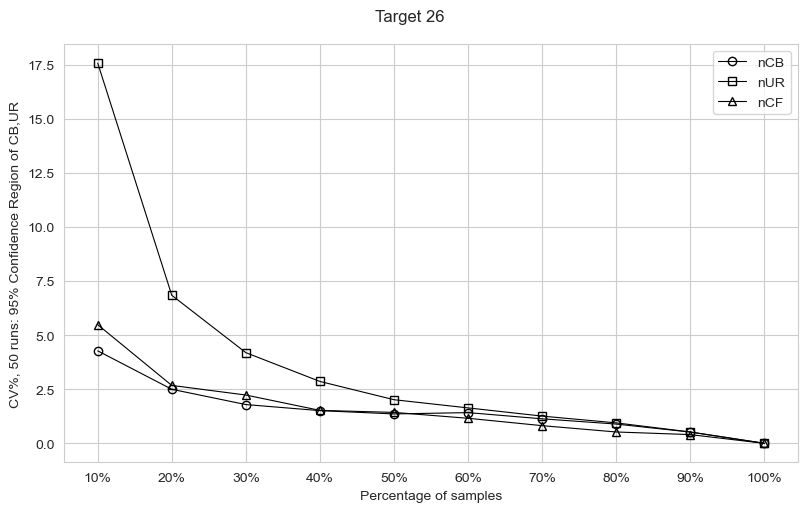

In [11]:
#coeficient variation
n=50
sns.set_style("whitegrid")

#read files
dados_CV_CB= pd.read_csv(f"Resume_CV2_Run{n}_CB.csv")
dados_CV_UR = pd.read_csv(f"Resume_CV2_Run{n}_UR.csv")
dados_CV_CF = pd.read_csv(f"Resume_CV2_Run{n}_CF.csv")

for i in range(1, 27):  # Loop over target values from 1 to 12 
    dadosCB = dados_CV_CB[dados_CV_CB["Target"]==i]
    X1_2 = np.array(dadosCB['propss'].values)
    Y1_2 = np.array(dadosCB ['CV_2'].values)
    dadosUR = dados_CV_UR[dados_CV_UR["Target"]==i]
    X2_2 = np.array(dadosUR ['propss'].values)
    Y2_2 = np.array(dadosUR ['CV_2'].values)
    dadosCF = dados_CV_CF[dados_CV_CF["Target"]==i]
    X3_2 = np.array(dadosCF ['propss'].values)
    Y3_2 = np.array(dadosCF ['CV_2'].values)
    
# create figure

    #fig, axs = plt.subplots(1, 3, figsize=(8, 5),sharey=True, sharex=True)  # 4 rows of 3 plots each to make 12 plots
    #axs = axs.ravel()  # Flatten the array of axes

    fig = plt.figure(figsize=(8, 5))
    #plt.xticks(np.arange(0, 20, 10))
    fig.suptitle("Target"+ ' '+str(i)+' ') 
    plt.plot(X1_2, Y1_2, "ko-",
         X2_2, Y2_2, "ks-",
         X3_2, Y3_2, "k^-",
        fillstyle='none',
        linewidth=0.8)
    
    plt.tight_layout()
    plt.xlabel("Percentage of samples")
    plt.ylabel('CV%, '+str(n)+' runs: 95% Confidence Region of CB,UR')
    plt.legend(['nCB','nUR','nCF'], loc='upper right')
    plt.savefig('Coeff_Var_runs='+str(n)+'_Target='+str(i)+'.png', dpi = 300,bbox_inches='tight')
    plt.savefig('Coeff_Var_runs='+str(n)+'_Target='+str(i)+'.pdf', bbox_inches='tight')



In [ ]:
import pandas as pd
import numpy as np

area_all_CB = pd.read_csv("Simulation_Area_Run10_CB.csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# area data ????????????????
dadosA = area_all_CB[area_all_CB["Target"]==1]
sns.set_style("whitegrid")
fig, ax = plt.subplots()
sns.boxplot(y=dadosA["Area_2"], x=dadosA["Samples"], hue=dadosA["Target"], ax=ax,palette ='Paired', notch=True)
#fig_title = "Boxplot plot: P1 Subset=CB"
#ax.set_title(fig_title)
#plt.legend(bbox_to_anchor =(1.0, 1.0), prop = { "size": 9 },loc='best',borderaxespad = 0.0, title = "CB Samples")
ax.set_ylabel( 'Convex Hull')
#ax.set_xticklabels('$CB Samples$')
ax.set_xlabel('')
plt.savefig('Boxplot_plot_Area_Run50_Subset_CB_T1.png', dpi = 300,bbox_inches='tight')
plt.savefig('Boxplot_plot_Area_Run50_Subset_CB_T1.eps',bbox_inches='tight')
plt.savefig('Boxplot_plot_Area_Run50_Subset_CB_T1.pdf',bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#all target ???????????????????
dados = dados_brutos_CB
sns.set_style("whitegrid")
fig, ax = plt.subplots()
sns.boxplot(y=dados["value"], x=dados["source"], hue=dados["Samples"], ax=ax,palette ="Paired", notch=True)
plt.legend(bbox_to_anchor =(1.0, 1.0), prop = { "size": 9 },loc='best',borderaxespad = 0.0, title = "CB Samples")
#fig_title = "Boxplot plot: P1 Subset=CB"
#ax.set_title(fig_title)
ax.set_ylabel( 'Relative source contribution')
# ax.set_xticklabels(('$P1$', '$P2$', '$P3$'))
ax.set_xlabel('')
plt.savefig('Boxplot_plot_all_P1_P2_P3_Run50_Subset_CB.png', dpi = 300,bbox_inches='tight')
plt.savefig('Boxplot_plot_all_P1_P2_P3_Run50_Subset_CB.eps',bbox_inches='tight')
plt.savefig('Boxplot_plot_all_P1_P2_P3_Run50_Subset_CB.pdf',bbox_inches='tight')

In [ ]:
import pandas as pd
import numpy as np

dados_CV_CB = pd.read_csv("Resume_CV2_Run10_CB.csv")

dados = dados_CV_CB[dados_CV_CB["Target"]==1]

X1_2 = np.array(dados['nSample'].values)
Y1_2 = np.array(dados ['CV_2'].values)



In [ ]:
import pandas as pd

dados_brutos_UR = pd.read_csv("Simulation_Ps_Run10_UR.csv")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dados = dados_brutos_UR[dados_brutos_UR["Target"]==1]
sns.set_style("whitegrid")
fig, ax = plt.subplots()
sns.boxplot(y=dados["value"], x=dados["source"], hue=dados["Samples"], ax=ax,palette ='Paired', notch=True)
#fig_title = "Boxplot plot: P1 Subset=CB"
#ax.set_title(fig_title)
plt.legend(bbox_to_anchor =(1.0, 1.0), prop = { "size": 9 },loc='best',borderaxespad = 0.0, title = "UR Samples")
ax.set_ylabel( 'Relative source contribution')
# ax.set_xticklabels(('$P1$', '$P2$', '$P3$'))
ax.set_xlabel('')
plt.savefig('Boxplot_plot_P1_P2_P3_Run50_Subset_UR_T1.png', dpi = 300,bbox_inches='tight')
plt.savefig('Boxplot_plot_P1_P2_P3_Run50_Subset_UR_T1.eps',bbox_inches='tight')
plt.savefig('Boxplot_plot_P1_P2_P3_Run50_Subset_UR_T1.pdf',bbox_inches='tight')

In [ ]:
import pandas as pd
import numpy as np

dados_CV_UR = pd.read_csv("Resume_CV2_Run50_UR.csv")
dados = dados_CV_UR[dados_CV_UR["Target"]==1]
X2_2 = np.array(dados ['nSample'].values)
Y2_2 = np.array(dados ['CV_2'].values)


In [ ]:
import pandas as pd

dados_brutos_CF = pd.read_csv("Simulation_Ps_Run10_CF.csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dados = dados_brutos_CF[dados_brutos_CF["Target"]==1]
sns.set_style("whitegrid")
fig, ax = plt.subplots()
sns.boxplot(y=dados["value"], x=dados["source"], hue=dados["Samples"], ax=ax,palette ='Paired', notch=True)
#fig_title = "Boxplot plot: P1 Subset=CB"
#ax.set_title(fig_title)
plt.legend(bbox_to_anchor =(1.0, 1.0), prop = { "size": 9 },loc='best',borderaxespad = 0.0, title = "CF Samples")
ax.set_ylabel( 'Relative source contribution')
# ax.set_xticklabels(('$P1$', '$P2$', '$P3$'))
ax.set_xlabel('')
plt.savefig('Boxplot_plot_P1_P2_P3_Run50_Subset_CF_T1.png', dpi = 300,bbox_inches='tight')
plt.savefig('Boxplot_plot_P1_P2_P3_Run50_Subset_CF_T1.eps',bbox_inches='tight')
plt.savefig('Boxplot_plot_P1_P2_P3_Run50_Subset_CF_T1.pdf',bbox_inches='tight')

In [ ]:
import pandas as pd
import numpy as np

dados_CV_CF = pd.read_csv("Resume_CV2_Run50_CF.csv")
dados = dados_CV_CF[dados_CV_CF["Target"]==1]
X3_2 = np.array(dados ['nSample'].values)
Y3_2 = np.array(dados ['CV_2'].values)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fig = plt.figure(figsize=(8, 5))
plt.xticks(np.arange(0, 22, 2))
plt.plot(X1_2, Y1_2, "ko-",
         X2_2, Y2_2, "ks-",
         X3_2, Y3_2, "k^-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: GLS_Clarke Model_ P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['nCB','nUR','nCF'], loc='upper right')
plt.savefig('Coeff_Var_Run50_nCB_and_nUR_and_nCF_GLS.png', dpi = 300,bbox_inches='tight')
plt.savefig('Coeff_Var_Run50_nCB_and_nUR_and_nCF_GLS.eps',bbox_inches='tight')
plt.savefig('Coeff_Var_Run50_nCB_and_nUR_and_nCF_GLS.pdf',bbox_inches='tight')
plt.grid()
plt.show()